<a href="https://colab.research.google.com/github/tiaratatyanadewi/Movie-Recommendation/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

1. Demographic Recommender:

A demographic recommender system suggests items to users based on their demographic information, such as age, gender, location, and income. It assumes that people with similar demographic profiles will have similar preferences.

Example: If a streaming service knows that younger users often watch superhero movies, it might recommend the latest superhero film to a 20-year-old user.

2. Content-Based Recommender:

A content-based recommender system suggests items based on the characteristics of the items themselves and the preferences of the user. It uses information about the items (like genre, actors, or directors for movies) and matches them with the user's past preferences.

Example: If a user has previously watched and liked romantic comedies, the system might recommend other romantic comedies, even if no other users have watched them.

3. Collaborative Recommender:

A collaborative recommender system suggests items based on the behavior and preferences of other users. It assumes that if users agree in their past preferences, they will agree in their future preferences as well. There are two main types: user-based and item-based collaborative filtering.

* User-Based Collaborative Filtering:
Recommends items that similar users have liked. If User A and User B have similar tastes, items liked by User B will be recommended to User A.

* Item-Based Collaborative Filtering: Recommends items that are similar to items the user has liked in the past. If a user liked Movie X, they might like Movie Y because other users who liked Movie X also liked Movie Y.


Example: If many users who liked "Inception" also liked "Interstellar," the system might recommend "Interstellar" to a user who enjoyed "Inception."

Each type of recommender system has its strengths and can be used in combination to improve recommendation accuracy.

In [31]:
!gdown 1CmUM-PBjePW_UMCwmEqXeF9ErztrIo_w

Downloading...
From: https://drive.google.com/uc?id=1CmUM-PBjePW_UMCwmEqXeF9ErztrIo_w
To: /content/tmdb_5000_credits.csv
100% 40.0M/40.0M [00:01<00:00, 37.2MB/s]


In [32]:
!gdown 1jRp7vqzutOz4DxLZoGfs6lbEn9lvXgAH

Downloading...
From: https://drive.google.com/uc?id=1jRp7vqzutOz4DxLZoGfs6lbEn9lvXgAH
To: /content/tmdb_5000_movies.csv
100% 5.70M/5.70M [00:00<00:00, 56.6MB/s]


In [33]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [34]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [35]:
df1.columns = ['id','title','cast','crew']
df1.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [36]:
df2= df2.merge(df1,on=['id', 'title'])
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Demographic Filtering

Before getting started with recommendations, we need a way to score or rate each movie. Here's how we can do it:

1. Metric for Scoring:

* We need a fair way to score movies.
* Just using average ratings isn't enough because a movie with a high average rating but few votes shouldn't rank higher than a movie with a lower average rating but many votes.

2. Weighted Rating (WR):

* We'll use IMDB's weighted rating formula to score movies.

3. Formula for Weighted Rating:
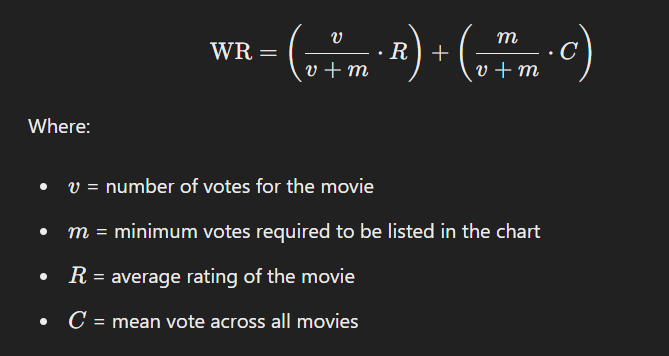

4. Steps:
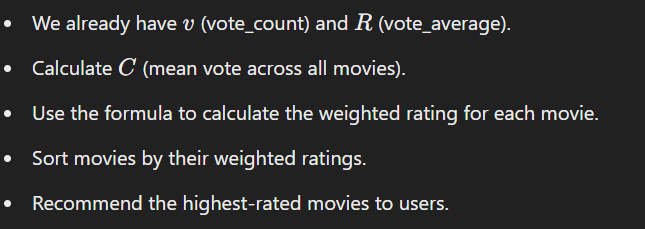

In [38]:
C =  df2['vote_average'].mean()
C

6.092171559442016

Now, we know that the mean reating for all of the movues is approximately 6 on a scale of 10. Next, determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90 percentile as our cutoff. So, it must have more votes than at least 90% of the movies in the list.

In [39]:
df2['vote_count'].value_counts()

vote_count
0       62
1       53
2       46
4       43
3       41
        ..
648      1
5862     1
3583     1
1174     1
2078     1
Name: count, Length: 1609, dtype: int64

In [40]:
m = df2['vote_count'].quantile(0.90)
m

1838.4000000000015

Now, filter out the movies that qualify for the chart

In [41]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 22)

In [42]:
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [43]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [44]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [45]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head()

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 5 Popular Movies')

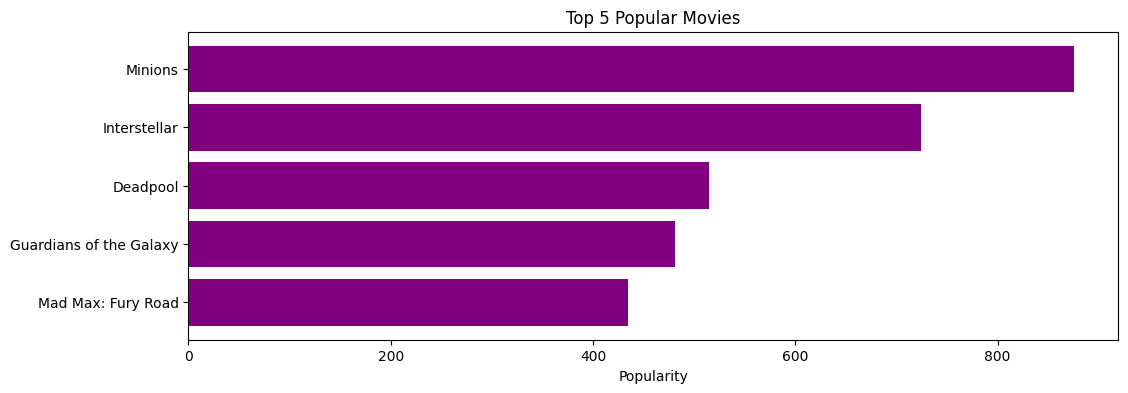

In [49]:
popular = df2.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(popular['title'].head(5), popular['popularity'].head(5), align='center', color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Top 5 Popular Movies")

## Content Based Filtering

In this recommender system, we use the content of the movie (like the overview, cast, crew, keywords, tagline, etc.) to find its similarity with other movies. Then, we recommend movies that are most similar.

###Plot Description-Based Recommender
1. Similarity Scores:

We compute similarity scores between movies based on their plot descriptions.

2. Data:

The plot description is found in the "overview" feature of our dataset.

3. Steps:

* Compare plot descriptions of all movies to calculate similarity scores.
* Recommend movies with the highest similarity scores to the user.



By focusing on the plot description, we can suggest movies that have similar storylines to the ones the user has liked before.

In [50]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

### Using Cosine Similarity for Movie Recommendation

We calculate a number that shows how similar two movies are.
Cosine similarity is good because it's simple and quick to compute.

####Why Cosine Similarity:

It doesn't depend on the size of the data.
It's easy and fast to calculate.

####Formula:
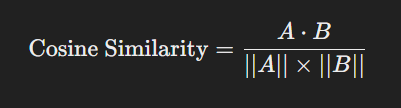


####Steps:

* We use TF-IDF vectorizer to convert plot descriptions into numerical form.
* The dot product of these vectors gives us the cosine similarity score.
* We'll use sklearn's linear_kernel() to compute this because it's faster.


By using cosine similarity and TF-IDF vectorizer, we can quickly find and recommend movies with similar plot descriptions.


In [52]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [53]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [54]:
def get_recommendations(title, cosine_similarity=cosine_similarity):
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    similarity_score = list(enumerate(cosine_similarity[idx]))

    # Sort the movies based on the similarity scores
    similarity_score = sorted(similarity_score, key=lambda x:x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    similarity_score = similarity_score[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in similarity_score]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]



In [55]:
get_recommendations('Interstellar')

1709         Space Pirate Captain Harlock
300                     Starship Troopers
4353                    The Green Inferno
220                            Prometheus
2260                      All Good Things
268                         Stuart Little
1352                              Gattaca
4176    Battle for the Planet of the Apes
2648                       Winnie Mandela
634                            The Matrix
Name: title, dtype: object

In [56]:
get_recommendations('Guardians of the Galaxy')

3150                  Heavy Metal
38       The Amazing Spider-Man 2
3649                Lovely, Still
2262                          CJ7
1572    Forgetting Sarah Marshall
2900      Space Battleship Yamato
1824         The Face of an Angel
20         The Amazing Spider-Man
193                   After Earth
1115           The Sweetest Thing
Name: title, dtype: object

In [57]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

### Credits, Genres and Keywords Based Recommender

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [58]:
# Parse the stringified features into their corresponding objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [59]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
  return np.nan

In [61]:
# Return the list of top 3 elements or entire list; whichever is more.
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    # Check if more than 3 elements exist. If yes, return only first three. If no, return enture list.
    if len(names) > 3:
      names = names[:3]
    return names

  # Return empty list in case of missing/malformed data
  return []


In [62]:
# Define new director, cast, genres, and keywords features thaht are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(get_list)

In [63]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [64]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
  if isinstance(x, list):
    return [str.lower(i.replace(" ", " ")) for i in x]
  else:
    # Check if director exists. If not, return empty string
    if isinstance(x, str):
      return str.lower(x.replace(" ", " "))
    else:
      return ''

In [65]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [66]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [67]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [70]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity2 = cosine_similarity(count_matrix, count_matrix)

In [71]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [72]:
get_recommendations('Interstellar', cosine_similarity2)

2375                    Midnight Special
634                           The Matrix
43                  Terminator Salvation
270                          The Martian
1446                    The Tree of Life
257                           Real Steel
363         A.I. Artificial Intelligence
2433    Superman IV: The Quest for Peace
3439                      The Terminator
2862                          About Time
Name: title, dtype: object

In [73]:
get_recommendations('Minions', cosine_similarity2)

358                     Atlantis: The Lost Empire
2899                           Legend of a Rabbit
221                               Stuart Little 2
2823    Harold & Kumar Escape from Guantanamo Bay
67                             Monsters vs Aliens
90                              The Polar Express
40                                         Cars 2
1426                                      Valiant
3670                              Running Forever
130                                          Bolt
Name: title, dtype: object

## Collaborative Filtering

Content-based filtering has limitations: it can only recommend similar movies and doesn't account for personal preferences. To address this, we use Collaborative Filtering which has two main types:

1. User-Based Filtering:

* Recommends movies that similar users have liked.
* Measures similarity between users using Pearson correlation or cosine similarity.
* Example: If User E and User B have similar tastes, User E will get recommendations based on what User B liked.

2. Item-Based Filtering:

* Recommends movies based on their similarity to movies the user has already rated.
* Measures similarity between items using Pearson correlation or cosine similarity.
* Example: If a user liked Movie X and Movie Y is similar to Movie X, the system will recommend Movie Y.

Both methods have challenges like changes in user preferences and scalability issues.

###Addressing Challenges with SVD (Singular Value Decomposition)

1. Scalability and Sparsity:

* We use SVD to reduce the problem's complexity.
* SVD breaks down the large matrix of user-item interactions into smaller matrices, capturing hidden factors (like movie genres).

2. Implementation:

* SVD helps predict user ratings by mapping users and items into a common latent space.
* We can then make recommendations based on these predictions.

To implement SVD for collaborative filtering, we'll use the Surprise library and a dataset that includes user IDs.

In [74]:
!gdown 1TqK42M7MOXRyKw-B9SyZVM3BJu9I3p4m

Downloading...
From: https://drive.google.com/uc?id=1TqK42M7MOXRyKw-B9SyZVM3BJu9I3p4m
To: /content/ratings_small.csv
100% 2.44M/2.44M [00:00<00:00, 40.5MB/s]


In [75]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357230 sha256=01c867773bea9177aa973ef765fc825051464a4f14a51e2dda79ee8e7b73ec5a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [78]:
from surprise import Reader, Dataset, SVD, accuracy
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [80]:
# Create a Trainset object instead of calling split on the Dataset object
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# If you need to do cross validation, you can use the following:
from surprise.model_selection import KFold
kf = KFold(n_splits=5)

In [85]:
# Iterate over folds and calculate accuracy for each
for trainset, testset in kf.split(data):
    svd = SVD()
    svd.fit(trainset)

    predictions = svd.test(testset)

    # Calculate and print accuracy metrics for the current fold
    print("RMSE:", accuracy.rmse(predictions))
    print("MAE:", accuracy.mae(predictions))
    print("-" * 20)  # Separator between folds

RMSE: 0.8949
RMSE: 0.8948542747396337
MAE:  0.6896
MAE: 0.6896079432011797
--------------------
RMSE: 0.8934
RMSE: 0.8934274327837467
MAE:  0.6886
MAE: 0.6886245714671326
--------------------
RMSE: 0.8973
RMSE: 0.8972883432611036
MAE:  0.6945
MAE: 0.6944527815139191
--------------------
RMSE: 0.8945
RMSE: 0.8945313895913274
MAE:  0.6884
MAE: 0.6884251416186548
--------------------
RMSE: 0.9055
RMSE: 0.9055215165238112
MAE:  0.6967
MAE: 0.6966790719127848
--------------------


In [86]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [87]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.723778429927255, details={'was_impossible': False})

## Conclusion
We created recommenders using demographic, content-based, and collaborative filtering:

1. Demographic Filtering: Basic and not practical on its own.
2. Content-Based Filtering: Uses movie content to find similar movies.
3. Collaborative Filtering: Uses user behavior to find similar movies or users.

Hybrid Systems: Combine content-based and collaborative filtering for better results as they complement each other.

This model is a starting point, providing a fundamental framework for building more advanced recommender systems.

## REFERENCE
https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook